In [1]:
import pandas as pd
import util

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv("SP_Data/spHistoryThrough11.tsv", sep="\t")

df["away"] = util.translateNames(df["away"])
df["home"] = util.translateNames(df["home"])

df.at[25, "away"] = "West Virginia"
df.at[25, "home"] = "Tennessee"

df = df.drop(38)  # Akron vs Nebraska game canceled

df

,week,away,home,site,spread,total,sp_spread,sp_total,sp_winProb,f_spread,f_winProb
0,0,Hawai'i,Colorado State,home,-17.0,58.0,-19.1,60.7,86.5%,-8.6,69.0%
1,0,Wyoming,New Mexico State,home,5.0,46.0,3.8,45.2,58.8%,6.5,64.7%
2,1,New Mexico State,Minnesota,home,-21.5,46.5,-8.6,48.6,69.0%,-16.3,82.8%
3,1,UCF,Connecticut,home,24.0,71.5,27.0,74.0,94.1%,28.3,94.9%
4,1,Northwestern,Purdue,home,-2.0,53.0,1.0,54.7,52.3%,4.5,60.2%
5,1,Wake Forest,Tulane,home,6.0,57.5,9.5,64.7,70.9%,14.8,80.5%
6,1,Syracuse,Western Michigan,home,5.0,64.5,-0.4,62.0,51.0%,-1.3,52.9%
7,1,Army,Duke,home,-12.0,45.0,-11.7,55.1,75.0%,-20.0,87.6%
8,1,Utah State,Michigan State,home,-23.5,50.5,-20.0,48.4,87.6%,-23.4,91.2%
9,1,San Diego State,Stanford,home,-14.0,48.5,-12.0,60.1,75.5%,-14.7,80.2%


In [3]:
games_df = pd.read_json("https://api.collegefootballdata.com/games?year=2018")
games_df = games_df[games_df.away_conference.notnull() & games_df.home_conference.notnull()]
games_df["result"] = games_df.away_points - games_df.home_points
games_df = games_df[["week", "away_team", "home_team", "result"]]
games_df

,week,away_team,home_team,result
2,1,Hawai'i,Colorado State,9
3,1,Wyoming,New Mexico State,22
4,1,New Mexico State,Minnesota,-38
6,1,UCF,Connecticut,39
12,1,Wake Forest,Tulane,6
13,1,Northwestern,Purdue,4
16,1,Syracuse,Western Michigan,13
18,1,Utah State,Michigan State,-7
19,1,Army,Duke,-20
21,1,San Diego State,Stanford,-21


In [4]:
sorted(games_df.away_team.unique())

['Air Force',
 'Akron',
 'Alabama',
 'Appalachian State',
 'Arizona',
 'Arizona State',
 'Arkansas',
 'Arkansas State',
 'Army',
 'Auburn',
 'BYU',
 'Ball State',
 'Baylor',
 'Boise State',
 'Boston College',
 'Bowling Green',
 'Buffalo',
 'California',
 'Central Michigan',
 'Charlotte',
 'Cincinnati',
 'Clemson',
 'Coastal Carolina',
 'Colorado',
 'Colorado State',
 'Connecticut',
 'Duke',
 'East Carolina',
 'Eastern Michigan',
 'Florida',
 'Florida Atlantic',
 'Florida International',
 'Florida State',
 'Fresno State',
 'Georgia',
 'Georgia Southern',
 'Georgia State',
 'Georgia Tech',
 "Hawai'i",
 'Houston',
 'Illinois',
 'Indiana',
 'Iowa',
 'Iowa State',
 'Kansas',
 'Kansas State',
 'Kent State',
 'Kentucky',
 'LSU',
 'Liberty',
 'Louisiana',
 'Louisiana Monroe',
 'Louisiana Tech',
 'Louisville',
 'Marshall',
 'Maryland',
 'Memphis',
 'Miami',
 'Miami (OH)',
 'Michigan',
 'Michigan State',
 'Middle Tennessee',
 'Minnesota',
 'Mississippi State',
 'Missouri',
 'NC State',
 'Navy',


In [5]:
df = pd.merge(df, games_df, how="outer", left_on=["away", "home"], right_on=["away_team", "home_team"])
df = df.drop(594)  # Week 12 MACtion Western Michigan at Ball State

print(df[df.isnull().any(axis=1)])
assert len(df[df.isnull().any(axis=1)]) == 0

Empty DataFrame
Columns: [week_x, away, home, site, spread, total, sp_spread, sp_total, sp_winProb, f_spread, f_winProb, week_y, away_team, home_team, result]
Index: []


In [6]:
df = df.drop(columns=["week_y", "away_team", "home_team", "f_spread", "f_winProb"])
df.columns = ["week", "away", "home", "site", "closing_spread", "total", "sp_spread", "sp_total", "sp_winProb", "result"]
df

,week,away,home,site,closing_spread,total,sp_spread,sp_total,sp_winProb,result
0,0.0,Hawai'i,Colorado State,home,-17.0,58.0,-19.1,60.7,86.5%,9
1,0.0,Wyoming,New Mexico State,home,5.0,46.0,3.8,45.2,58.8%,22
2,1.0,New Mexico State,Minnesota,home,-21.5,46.5,-8.6,48.6,69.0%,-38
3,1.0,UCF,Connecticut,home,24.0,71.5,27.0,74.0,94.1%,39
4,1.0,Northwestern,Purdue,home,-2.0,53.0,1.0,54.7,52.3%,4
5,1.0,Wake Forest,Tulane,home,6.0,57.5,9.5,64.7,70.9%,6
6,1.0,Syracuse,Western Michigan,home,5.0,64.5,-0.4,62.0,51.0%,13
7,1.0,Army,Duke,home,-12.0,45.0,-11.7,55.1,75.0%,-20
8,1.0,Utah State,Michigan State,home,-23.5,50.5,-20.0,48.4,87.6%,-7
9,1.0,San Diego State,Stanford,home,-14.0,48.5,-12.0,60.1,75.5%,-21


In [7]:
df["prediction_diff"] = df["sp_spread"] - df["closing_spread"]
df["result_diff"] = df["result"] - df["closing_spread"]
df

,week,away,home,site,closing_spread,total,sp_spread,sp_total,sp_winProb,result,prediction_diff,result_diff
0,0.0,Hawai'i,Colorado State,home,-17.0,58.0,-19.1,60.7,86.5%,9,-2.1,26.0
1,0.0,Wyoming,New Mexico State,home,5.0,46.0,3.8,45.2,58.8%,22,-1.2,17.0
2,1.0,New Mexico State,Minnesota,home,-21.5,46.5,-8.6,48.6,69.0%,-38,12.9,-16.5
3,1.0,UCF,Connecticut,home,24.0,71.5,27.0,74.0,94.1%,39,3.0,15.0
4,1.0,Northwestern,Purdue,home,-2.0,53.0,1.0,54.7,52.3%,4,3.0,6.0
5,1.0,Wake Forest,Tulane,home,6.0,57.5,9.5,64.7,70.9%,6,3.5,0.0
6,1.0,Syracuse,Western Michigan,home,5.0,64.5,-0.4,62.0,51.0%,13,-5.4,8.0
7,1.0,Army,Duke,home,-12.0,45.0,-11.7,55.1,75.0%,-20,0.3,-8.0
8,1.0,Utah State,Michigan State,home,-23.5,50.5,-20.0,48.4,87.6%,-7,3.5,16.5
9,1.0,San Diego State,Stanford,home,-14.0,48.5,-12.0,60.1,75.5%,-21,2.0,-7.0


In [8]:
BET_THRESHOLD = 0.2

df["ats_result"] = "NO BET"
for index, row in df.iterrows():
    if row["prediction_diff"] <= -1 * BET_THRESHOLD:  # predicted home win
        if row["result_diff"] < 0:  # home wins
            df.at[index, "ats_result"] = "W"
        elif row["result_diff"] > 0:
            df.at[index, "ats_result"] = "L"
        else:
            df.at[index, "ats_result"] = "P"
    elif row["prediction_diff"] >= BET_THRESHOLD:  # predicted away win
        if row["result_diff"] > 0:  # away wins
            df.at[index, "ats_result"] = "W"
        elif row["result_diff"] < 0:
            df.at[index, "ats_result"] = "L"
        else:
            df.at[index, "ats_result"] = "P"
    else:
        pass  # no bet
df

,week,away,home,site,closing_spread,total,sp_spread,sp_total,sp_winProb,result,prediction_diff,result_diff,ats_result
0,0.0,Hawai'i,Colorado State,home,-17.0,58.0,-19.1,60.7,86.5%,9,-2.1,26.0,L
1,0.0,Wyoming,New Mexico State,home,5.0,46.0,3.8,45.2,58.8%,22,-1.2,17.0,L
2,1.0,New Mexico State,Minnesota,home,-21.5,46.5,-8.6,48.6,69.0%,-38,12.9,-16.5,L
3,1.0,UCF,Connecticut,home,24.0,71.5,27.0,74.0,94.1%,39,3.0,15.0,W
4,1.0,Northwestern,Purdue,home,-2.0,53.0,1.0,54.7,52.3%,4,3.0,6.0,W
5,1.0,Wake Forest,Tulane,home,6.0,57.5,9.5,64.7,70.9%,6,3.5,0.0,P
6,1.0,Syracuse,Western Michigan,home,5.0,64.5,-0.4,62.0,51.0%,13,-5.4,8.0,L
7,1.0,Army,Duke,home,-12.0,45.0,-11.7,55.1,75.0%,-20,0.3,-8.0,L
8,1.0,Utah State,Michigan State,home,-23.5,50.5,-20.0,48.4,87.6%,-7,3.5,16.5,W
9,1.0,San Diego State,Stanford,home,-14.0,48.5,-12.0,60.1,75.5%,-21,2.0,-7.0,L


In [9]:
print("WINS:")
wins_df = df[df.ats_result == "W"]
wins_df

WINS:


,week,away,home,site,closing_spread,total,sp_spread,sp_total,sp_winProb,result,prediction_diff,result_diff,ats_result
3,1.0,UCF,Connecticut,home,24.0,71.5,27.0,74.0,94.1%,39,3.0,15.0,W
4,1.0,Northwestern,Purdue,home,-2.0,53.0,1.0,54.7,52.3%,4,3.0,6.0,W
8,1.0,Utah State,Michigan State,home,-23.5,50.5,-20.0,48.4,87.6%,-7,3.5,16.5,W
10,1.0,Western Kentucky,Wisconsin,home,-36.0,52.5,-25.6,52.2,93.0%,-31,10.4,5.0,W
12,1.0,Houston,Rice,home,25.5,55.5,15.3,56.7,81.2%,18,-10.2,-7.5,W
13,1.0,Kent State,Illinois,home,-16.0,55.5,-10.0,49.8,71.9%,-7,6.0,9.0,W
14,1.0,Texas,Maryland,neutral,13.5,52.5,8.8,52.6,69.5%,-5,-4.7,-18.5,W
15,1.0,Oregon State,Ohio State,home,-38.0,64.0,-41.5,61.9,99.2%,-46,-3.5,-8.0,W
17,1.0,Ole Miss,Texas Tech,neutral,-2.0,67.0,6.5,64.5,64.6%,20,8.5,22.0,W
22,1.0,Central Michigan,Kentucky,home,-17.0,49.0,-15.0,51.6,80.8%,-15,2.0,2.0,W


In [10]:
print("LOSSES:")
losses_df = df[df.ats_result == "L"]
losses_df

LOSSES:


,week,away,home,site,closing_spread,total,sp_spread,sp_total,sp_winProb,result,prediction_diff,result_diff,ats_result
0,0.0,Hawai'i,Colorado State,home,-17.0,58.0,-19.1,60.7,86.5%,9,-2.1,26.0,L
1,0.0,Wyoming,New Mexico State,home,5.0,46.0,3.8,45.2,58.8%,22,-1.2,17.0,L
2,1.0,New Mexico State,Minnesota,home,-21.5,46.5,-8.6,48.6,69.0%,-38,12.9,-16.5,L
6,1.0,Syracuse,Western Michigan,home,5.0,64.5,-0.4,62.0,51.0%,13,-5.4,8.0,L
7,1.0,Army,Duke,home,-12.0,45.0,-11.7,55.1,75.0%,-20,0.3,-8.0,L
9,1.0,San Diego State,Stanford,home,-14.0,48.5,-12.0,60.1,75.5%,-21,2.0,-7.0,L
11,1.0,Colorado,Colorado State,neutral,7.5,65.0,1.2,61.4,52.8%,32,-6.3,24.5,L
16,1.0,Florida Atlantic,Oklahoma,home,-21.0,72.0,-13.0,70.6,77.3%,-49,8.0,-28.0,L
18,1.0,Texas State,Rutgers,home,-16.5,46.5,-12.7,48.9,76.9%,-28,3.8,-11.5,L
19,1.0,Coastal Carolina,South Carolina,home,-29.0,57.0,-23.6,55.8,91.4%,-34,5.4,-5.0,L


In [11]:
print("PUSHES:")
pushes_df = df[df.ats_result == "P"]
pushes_df

PUSHES:


,week,away,home,site,closing_spread,total,sp_spread,sp_total,sp_winProb,result,prediction_diff,result_diff,ats_result
5,1.0,Wake Forest,Tulane,home,6.0,57.5,9.5,64.7,70.9%,6,3.5,0.0,P
28,1.0,North Carolina,California,home,-7.0,60.5,-0.9,57.4,52.1%,-7,6.1,0.0,P
269,6.0,Boston College,NC State,home,-5.0,59.0,-8.1,56.8,67.9%,-5,-3.1,0.0,P
343,7.0,Temple,Navy,home,7.0,49.0,9.1,59.3,70.1%,7,2.1,0.0,P
430,9.0,UMass,Connecticut,home,5.0,69.5,10.7,76.0,73.2%,5,5.7,0.0,P
488,10.0,Texas A&M,Auburn,home,-4.0,49.0,-5.8,48.1,63.0%,-4,-1.8,0.0,P
563,11.0,Mississippi State,Alabama,home,-24.0,54.0,-17.8,55.8,84.8%,-24,6.2,0.0,P
576,11.0,Georgia State,Louisiana,home,-14.0,67.5,-12.4,72.4,76.3%,-14,1.6,0.0,P


In [12]:
print("NO BET:")
nb_df = df[df.ats_result == "NO BET"]
nb_df

NO BET:


,week,away,home,site,closing_spread,total,sp_spread,sp_total,sp_winProb,result,prediction_diff,result_diff,ats_result
41,1.0,BYU,Arizona,home,-11.5,60.5,-11.7,57.9,75.1%,5,-0.2,16.5,NO BET
54,2.0,Western Michigan,Michigan,home,-28.0,56.5,-28.2,60.0,94.9%,-46,-0.2,-18.0,NO BET
69,2.0,Maryland,Bowling Green,home,16.0,65.5,16.1,73.8,82.5%,31,0.1,15.0,NO BET
75,2.0,Wyoming,Missouri,home,-18.5,52.0,-18.6,65.8,85.9%,-27,-0.1,-8.5,NO BET
84,2.0,Penn State,Pittsburgh,home,9.5,56.0,9.3,74.9,70.5%,45,-0.2,35.5,NO BET
88,2.0,UTEP,UNLV,home,-24.0,55.5,-23.8,50.4,91.6%,-28,0.2,-4.0,NO BET
263,6.0,Missouri,South Carolina,home,-1.0,64.5,-1.1,62.7,52.6%,-2,-0.1,-1.0,NO BET
327,7.0,Southern Mississippi,North Texas,home,-9.0,57.0,-9.0,49.1,69.8%,-23,0.0,-14.0,NO BET
351,7.0,Louisiana Tech,UT San Antonio,home,11.5,45.0,11.3,52.1,74.4%,28,-0.2,16.5,NO BET
379,8.0,Bowling Green,Ohio,home,-16.5,70.0,-16.5,80.3,83.0%,-35,0.0,-18.5,NO BET


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

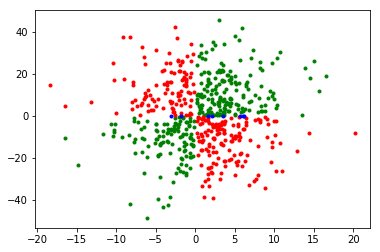

In [14]:
plt.plot(wins_df.prediction_diff, wins_df.result_diff, "g.")
plt.plot(losses_df.prediction_diff, losses_df.result_diff, "r.")
plt.plot(pushes_df.prediction_diff, pushes_df.result_diff, "b.")

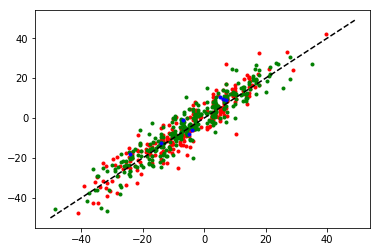

In [15]:
plt.plot(losses_df.closing_spread, losses_df.sp_spread, "r.")
plt.plot(wins_df.closing_spread, wins_df.sp_spread, "g.")
plt.plot(pushes_df.closing_spread, pushes_df.sp_spread, "b.")
plt.plot(range(-50, 50), range(-50, 50), "k--")

In [16]:
print(len(wins_df))
print(len(losses_df))
print(len(pushes_df))
print(len(df))

print("TOTAL ATS ACCURACY:")
print(len(wins_df) / (len(wins_df) + len(losses_df)))

303
256
8
594
TOTAL ATS ACCURACY:
0.5420393559928444


In [17]:
df = df.round(0)
df

,week,away,home,site,closing_spread,total,sp_spread,sp_total,sp_winProb,result,prediction_diff,result_diff,ats_result
0,0.0,Hawai'i,Colorado State,home,-17.0,58.0,-19.0,61.0,86.5%,9,-2.0,26.0,L
1,0.0,Wyoming,New Mexico State,home,5.0,46.0,4.0,45.0,58.8%,22,-1.0,17.0,L
2,1.0,New Mexico State,Minnesota,home,-22.0,46.0,-9.0,49.0,69.0%,-38,13.0,-16.0,L
3,1.0,UCF,Connecticut,home,24.0,72.0,27.0,74.0,94.1%,39,3.0,15.0,W
4,1.0,Northwestern,Purdue,home,-2.0,53.0,1.0,55.0,52.3%,4,3.0,6.0,W
5,1.0,Wake Forest,Tulane,home,6.0,58.0,10.0,65.0,70.9%,6,4.0,0.0,P
6,1.0,Syracuse,Western Michigan,home,5.0,64.0,-0.0,62.0,51.0%,13,-5.0,8.0,L
7,1.0,Army,Duke,home,-12.0,45.0,-12.0,55.0,75.0%,-20,0.0,-8.0,L
8,1.0,Utah State,Michigan State,home,-24.0,50.0,-20.0,48.0,87.6%,-7,4.0,16.0,W
9,1.0,San Diego State,Stanford,home,-14.0,48.0,-12.0,60.0,75.5%,-21,2.0,-7.0,L


In [18]:
grouped = df.groupby("sp_spread").agg(["count", "mean"])["result"]
grouped.columns = ["num_instances", "mean_result"]
grouped = grouped[grouped.num_instances >= 5]
grouped

,num_instances,mean_result
sp_spread,,
-29.0,6,-30.000000
-26.0,6,-23.000000
-25.0,6,-13.500000
-24.0,13,-28.153846
-23.0,7,-18.000000
-22.0,6,-17.666667
-21.0,9,-22.111111
-20.0,7,-19.285714
-19.0,12,-19.166667


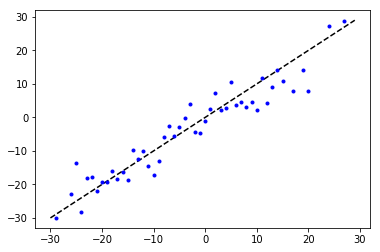

In [19]:
plt.plot(range(-30, 30), range(-30, 30), "k--")
plt.plot(grouped.index, grouped.mean_result, "b.")